In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [4]:
mnist_train = dsets.MNIST(
    root="../input", train=True, transform=transforms.ToTensor(), download=True
)
mnist_test = dsets.MNIST(
    root="../input", train=False, transform=transforms.ToTensor(), download=True
)

In [5]:
loader_train = DataLoader(
    dataset=mnist_train, batch_size=64, shuffle=True, drop_last=True
)
loader_test = DataLoader(dataset=mnist_test, batch_size=64, shuffle=False)

In [6]:
model = nn.Sequential(
    nn.Linear(28 * 28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
).to(device)
model

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=10, bias=True)
)

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [8]:
epochs = 3

In [9]:
for epoch in range(epochs):
    for data, targets in loader_train:
        data = data.view(-1, 28 * 28).to(device)
        optimizer.zero_grad()
        y_pred = model(data)
        loss = loss_fn(y_pred, targets.to(device))
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1:4d}/{epochs} Cost: {loss.item():.6f}")

Epoch    1/3 Cost: 0.159502
Epoch    2/3 Cost: 0.055072
Epoch    3/3 Cost: 0.046659


model.eval()을 통해서 모델을 추론 모드로 전환해주면 Dropout, BatchNorm등의 동작을 평가용으로 변경한다.

In [10]:
model.eval()
correct = 0

with torch.no_grad():
    for data, targets in loader_test:
        data = data.view(-1, 28 * 28).to(device)
        outputs = model(data)

        _, predicted = torch.max(outputs.data, dim=1)
        correct += predicted.eq(targets.data.view_as(predicted).to(device)).sum()

data_num = len(loader_test.dataset)
print(f"Accuracy: {correct}/{data_num} ({100 * correct / data_num:.0f}%)")

Accuracy: 9569/10000 (96%)


predicted: 4, target=4


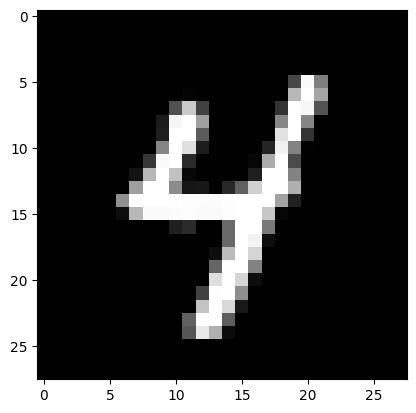

In [21]:
data, target = mnist_test[2615]
output = model(data.view(-1, 28 * 28).to(device))
print(f"predicted: {torch.argmax(output, dim=1).item()}, target={target}")

import matplotlib.pyplot as plt

plt.imshow(data.numpy().reshape(28, 28), cmap="gray")